In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import re #remove char
import matplotlib.pyplot as plt

#Main train
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

Using TensorFlow backend.


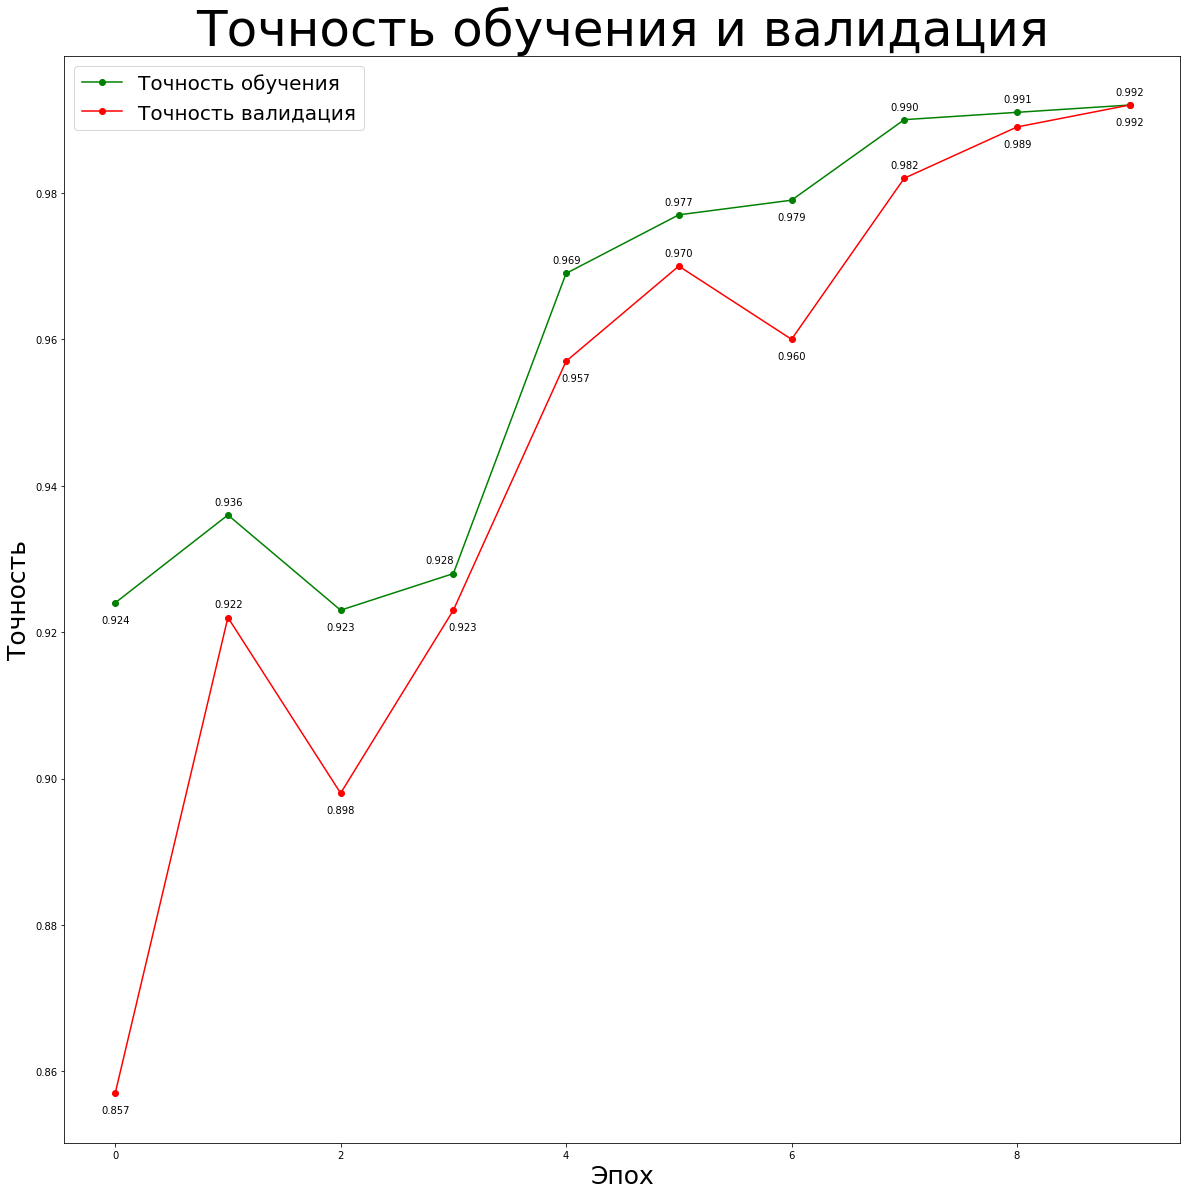

In [2]:
epochs = [i for i in range(10)]
plt.figure(figsize = (20, 20))

train_accuracy = [0.924, 0.936, 0.923, 0.928, 0.969, 0.977, 0.979, 0.990, 0.991, 0.992]
validation_accuracy = [0.857, 0.922, 0.898, 0.923, 0.957, 0.970, 0.960, 0.982, 0.989, 0.992]

plt.plot(epochs, train_accuracy,
         'go-', label = 'Точность обучения')
plt.plot(epochs, validation_accuracy,
         'ro-', label = 'Точность валидация')

for i in range(10):
    if (i == 1 or i == 4 or i == 5 or i >= 7):
        plt.annotate(str('{0:.3f}'.format(train_accuracy[i])),
                     xy = (epochs[i], train_accuracy[i]),
                     xytext = (-14, 10),
                     textcoords = "offset points")
    else:
        if (i == 3):
            plt.annotate(str('{0:.3f}'.format(train_accuracy[i])),
                 xy = (epochs[i], train_accuracy[i]),
                 xytext = (-28, 10),
                 textcoords = "offset points")
        else:
            plt.annotate(str('{0:.3f}'.format(train_accuracy[i])),
                         xy = (epochs[i], train_accuracy[i]),
                         xytext = (-14, -20),
                         textcoords = "offset points")

for i in range(10):
    if (i == 1 or i == 5 or i == 7):
        plt.annotate(str('{0:.3f}'.format(validation_accuracy[i])),
                     xy = (epochs[i], validation_accuracy[i]),
                     xytext = (-14, 10),
                     textcoords = "offset points")
    else:
        if (i == 3):
            plt.annotate(str('{0:.3f}'.format(validation_accuracy[i])),
             xy = (epochs[i], validation_accuracy[i]),
             xytext = (-5, -20),
             textcoords = "offset points")
        else:
            if (i == 4):
                plt.annotate(str('{0:.3f}'.format(validation_accuracy[i])),
                 xy = (epochs[i], validation_accuracy[i]),
                 xytext = (-5, -20),
                 textcoords = "offset points")
            else:
                plt.annotate(str('{0:.3f}'.format(validation_accuracy[i])),
                             xy = (epochs[i], validation_accuracy[i]),
                             xytext = (-14, -20),
                             textcoords = "offset points")

plt.title('Точность обучения и валидация', fontsize = 50)
plt.legend(fontsize = 20)

plt.xlabel("Эпох", fontsize = 25)
plt.ylabel("Точность", fontsize = 25)

plt.savefig('acc_1.png')
plt.show()

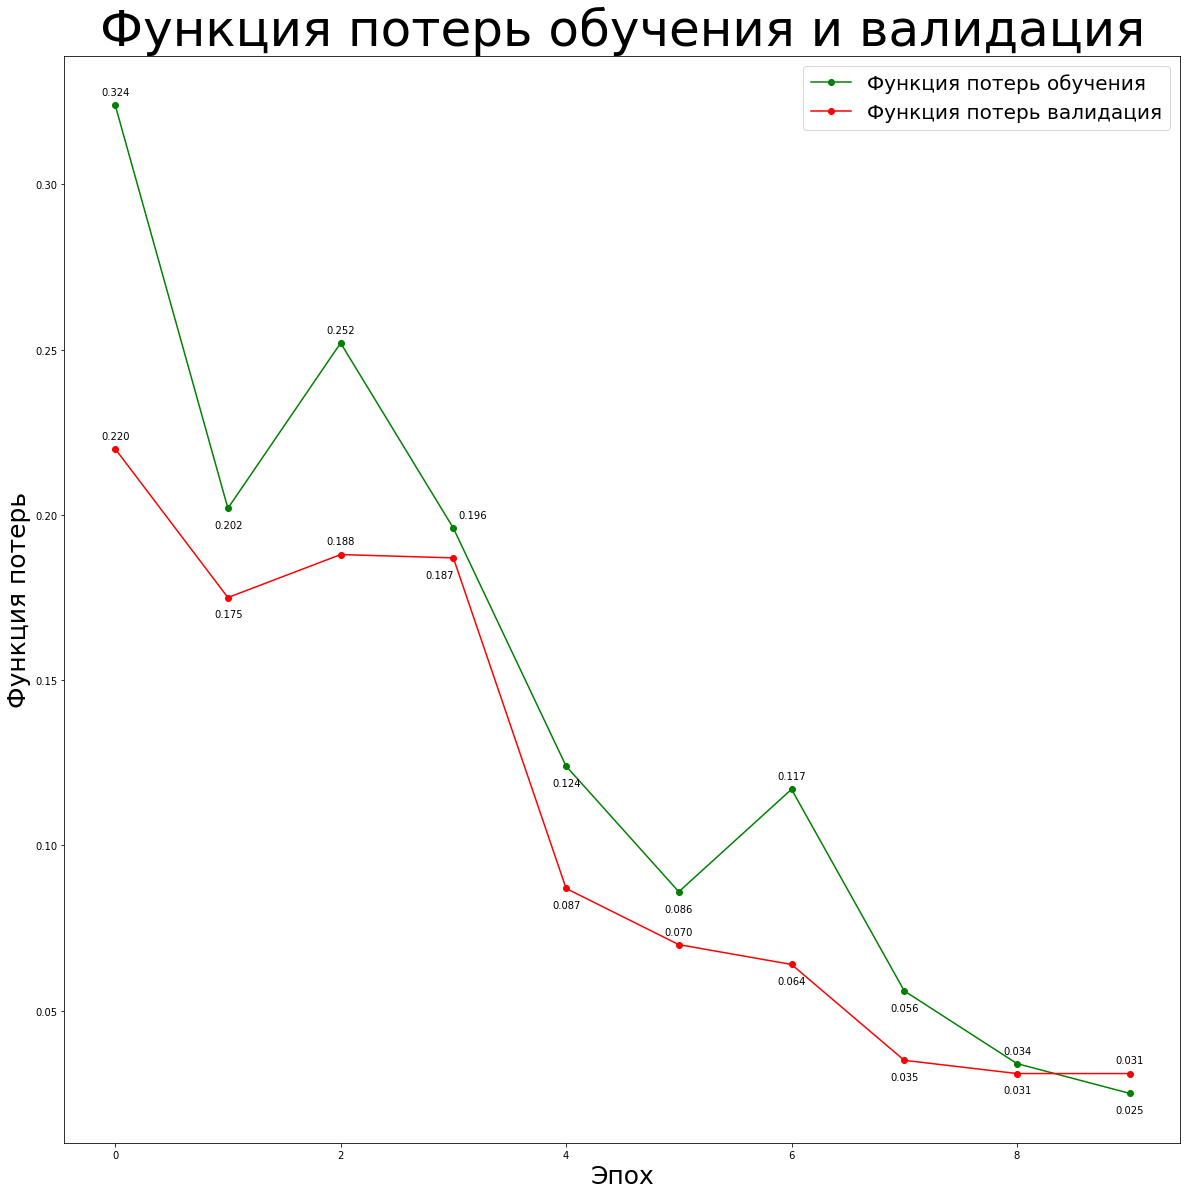

In [3]:
plt.figure(figsize = (20, 20))

train_loss =      [0.324, 0.202, 0.252, 0.196, 0.124, 0.086, 0.117, 0.056, 0.034, 0.025]
validation_loss = [0.220, 0.175, 0.188, 0.187, 0.087, 0.070, 0.064, 0.035, 0.031, 0.031]

plt.plot(epochs , train_loss,
         'go-' , label = 'Функция потерь обучения')
plt.plot(epochs , validation_loss,
         'ro-' , label = 'Функция потерь валидация')

for i in range(10):
    if (i == 3):
        plt.annotate(str('{0:.3f}'.format(train_loss[i])),
                     xy = (epochs[i], train_loss[i]),
                     xytext = (5, 10),
                     textcoords = "offset points")
        continue
    if (i == 0 or i == 2 or i == 3 or i == 6 or i == 8):
        plt.annotate(str('{0:.3f}'.format(train_loss[i])),
                     xy = (epochs[i], train_loss[i]),
                     xytext = (-14, 10),
                     textcoords = "offset points")
    else:
        plt.annotate(str('{0:.3f}'.format(train_loss[i])),
                     xy = (epochs[i], train_loss[i]),
                     xytext = (-14, -20),
                     textcoords = "offset points")

for i in range(10):
    if (i == 3):
        plt.annotate(str('{0:.3f}'.format(validation_loss[i])),
                     xy = (epochs[i], validation_loss[i]),
                     xytext = (-28, -20),
                     textcoords = "offset points")
        continue
    if (i == 0 or i == 2 or i == 5 or i == 9):
        plt.annotate(str('{0:.3f}'.format(validation_loss[i])),
                     xy = (epochs[i], validation_loss[i]),
                     xytext = (-14, 10),
                     textcoords = "offset points")
    else:
        plt.annotate(str('{0:.3f}'.format(validation_loss[i])),
                     xy = (epochs[i], validation_loss[i]),
                     xytext = (-14, -20),
                     textcoords = "offset points")

plt.title('Функция потерь обучения и валидация', fontsize = 50)
plt.legend(fontsize = 20)

plt.xlabel("Эпох", fontsize = 25)
plt.ylabel("Функция потерь", fontsize = 25)

plt.savefig('loss_1.png')
plt.show()

In [5]:
prediction = []
validation_output = []
for i in range(5368):
    validation_output.append(1)

for i in range(5352):
    prediction.append(1)
for i in range(5352, 5368):
    prediction.append(0)

for i in range(5857):
    validation_output.append(0)

for i in range(5781):
    prediction.append(0)

for i in range(5781, 5857):
    prediction.append(1)

In [6]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(validation_output, prediction)
cm = pd.DataFrame(cm , index = ['Ложь','Правда'] , columns = ['Ложь','Правда'])

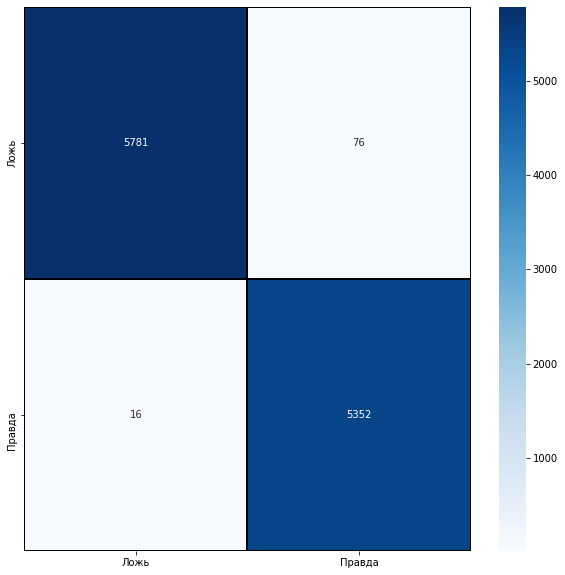

In [8]:
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Ложь','Правда'] , yticklabels = ['Ложь','Правда'])
plt.savefig("heatmap.png")